#Тестовое задание на позицию "Аналитик данных".
[Ссылка на мое резюме](https://hh.ru/resume/c30c99f9ff0d8974110039ed1f6d7933574648)

##Задание 1

In [ ]:
import pandas as pd
url = 'https://docs.google.com/spreadsheets/d/1nBItSe_wwSU1TFC-Ixw7Dx0z9LWQKmSRbNyaj8XT30Y/export?format=csv'
df = pd.read_csv(url)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9800 non-null   int64 
 1   Order Date    9800 non-null   object
 2   Class         9800 non-null   object
 3   Region        9800 non-null   object
 4   Sub-Category  9800 non-null   object
 5   Sales         9800 non-null   object
dtypes: int64(1), object(5)
memory usage: 459.5+ KB


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


Из .info() видно, что экспортировалось не все тем типом данных, каким должно быть. Сначала изменим это.

In [ ]:
df['Sales'] = [float(str(i).replace(",", ".")) for i in df['Sales']]
df = df.astype({'Order Date': 'datetime64[ns]'})
df.dtypes
df

<ipython-input-26-fdbb9aeac6de>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = df.astype({'Order Date': 'datetime64[ns]'})


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


Теперь все ок, можно работать с данными.

In [ ]:
def barplot_Sales(df):
    df = df.groupby(['Sub-Category']).agg({'Sales': 'sum'}).sort_values('Sales', ascending=False)
    return df.plot.bar()

<Axes: xlabel='Sub-Category'>

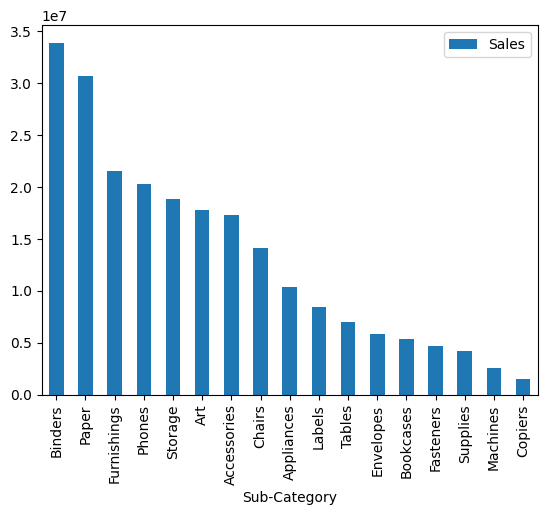

In [ ]:
barplot_Sales(df)

За все время наиболее часто покупаемыми являются категории Binders, Paper, Furnishings, Phones.

2018-12-30 00:00:00


<Axes: xlabel='Sub-Category'>

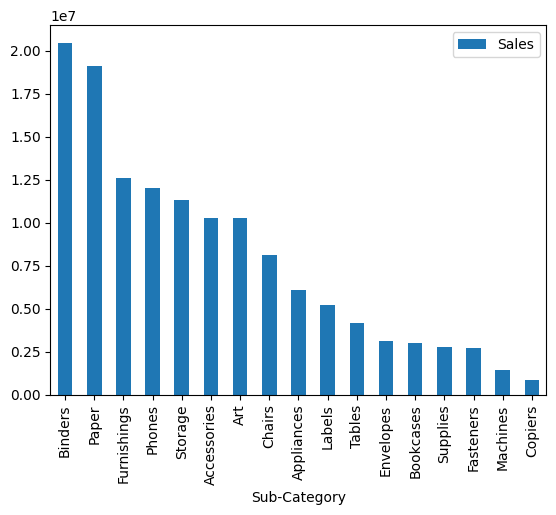

In [ ]:
print(df['Order Date'].max()) #Проверяем, когда была сделана последняя запись в таблице, чтобы она стала точкой отсчета для следующих заданий.
df_last_2_years = df[df['Order Date'] >= '2016-12-30']
barplot_Sales(df_last_2_years)

Снова те же категории: Binders, Paper, Furnishings, Phones.

<Axes: xlabel='Sub-Category'>

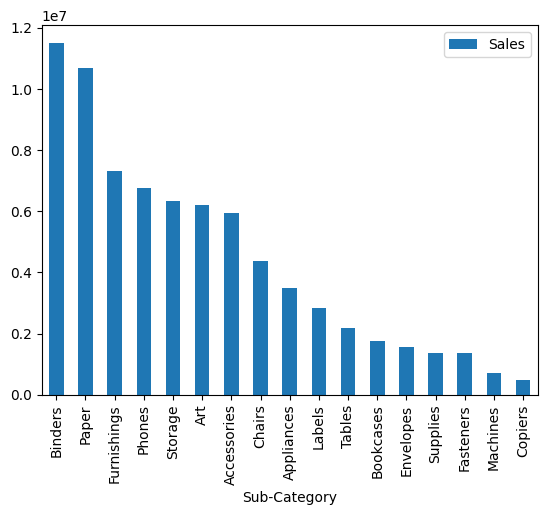

In [ ]:
df_last_year = df[df['Order Date'] >= '2017-12-30']
barplot_Sales(df_last_year)

И снова самыми покупаемыми являются Binders, Paper, Furnishings, Phones. Можно говорить о стабильной ситуации, никаких резких изменений в категориях покупок не было.

##Задание 2

<Axes: xlabel='Sales'>

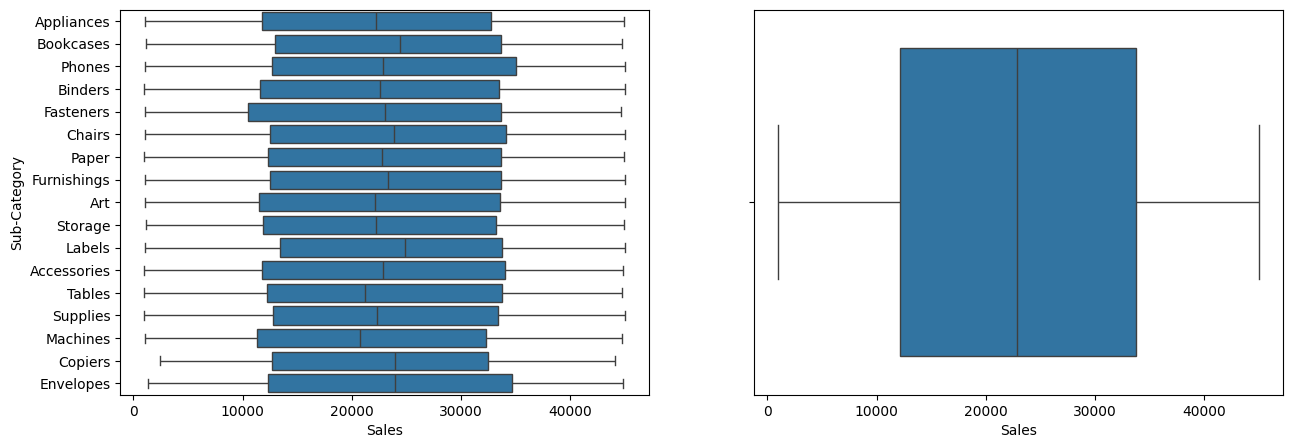

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x = df['Sales'], y = df['Sub-Category'], ax=axes[0])
sns.boxplot(x = df['Sales'], ax=axes[1])

По графику мы вообще не видим выбросов.

*Тут я подумал, что можно построить boxplot по группам, и попробовать найти аномалии там, раз их нет на общем графике. Все-таки задание найти и убрать их. Поэтому выше не один ящик с усами, а два графика: слева ящики с усами для всех категорий, справа один общий.*

Попробуем теперь проверить все через правило трех сигм.

In [ ]:
lower = df['Sales'].mean() - 3 * df['Sales'].std()
upper = df['Sales'].mean() + 3 * df['Sales'].std()

outliers = df[(df['Sales'] < lower) | (df['Sales'] > upper)]
print(outliers)

Empty DataFrame
Columns: [ID, Order Date, Class, Region, Sub-Category, Sales]
Index: []


Получился пустой датафрейм, значит, все-таки аномальных значений нет. Если бы они были, очищенная от них таблица выглядела бы так:
```
cleaned_df = df[(df['Sales'] >= lower) & (df['Sales'] <= upper)]
```
но в данном случае нет такой необходимости, очищенные данные полностью совпадают с изначальными.


##Задание 3

In [ ]:
max_value = df['Sales'].max()
min_value = df['Sales'].min()
coeff = (max_value - min_value)/3
mid_sales_boundary = min_value + coeff
high_sales_boundary = min_value + 2 * coeff
sale_group = []
for i in df['Sales']:
    if i < mid_sales_boundary:
        sale_group.append('low')
    elif i >= mid_sales_boundary and i <= high_sales_boundary:
        sale_group.append('mid')
    elif i > high_sales_boundary:
        sale_group.append('high')
new_df = df
new_df['Sale_group'] = sale_group
new_df
new_df.groupby(['Region', 'Sale_group']).count().drop(columns=['ID', 'Order Date', 'Class', 'Sub-Category'])

Sales
Region      Sale_group       
Владивосток high          944
            low           947
            mid           894
Калиниград  high          991
            low          1039
            mid          1110
Москва      high          530
            low           520
            mid           548
Урал        high          744
            low           767
            mid           766

Внутри каждой группы примерно одинаковое распределение высоких, средних и низких продаж, но за пределами групп числа сильно отличаются. На Урале преобладает сегмент low (хотя и очень близкое значение к mid), в Москве mid, в Калининграде mid, во Владивостоке low. Самой прибыльной группой является Калининград, где как и в целом больше всего продаж, так и самое большое количеcтво продаж в сегменте high.